# Introduction to Lasio

Lasio (las input/output) is a fantastic package for working with .las files. Note! .las files are also used for LiDAR data, but this is for well logs, and not that data type. The Github is [here](https://github.com/kinverarity1/lasio).

In [2]:
!pip install lasio # ! before the pip important for notebooks

In [0]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt

Ok! Now we are ready to work

## Importing a .las file

In [4]:
ls

drive/  sample_data/


Navigate to where your folder/data is. If you are already there, don't run the next block of code.

In [5]:
cd drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [6]:
ls

 0_Intro_To_Using_Colab.ipynb
 1_Pandas_Cleaning_Example_Geothermal.ipynb
 2_Intro_to_Lasio.ipynb
 4900722147_722147B.las
 490072236400.csv
 4900722364_722364A.las
 4900722364A.las
'B Romans - Intro.ipynb'
 clustering_TF2_GCP.ipynb
'Copy of clustering_TEST_GCP_TF1.ipynb'
 Transform2020_Rules.las


In [0]:
l = lasio.read('4900722364A.las')

One line! Lasio is awesome, and is compatible with 99.5% of modern well logs in my experiance. 

## Digging through the header

If you want to check out what curves are in this file:

In [8]:
l.curves 

[CurveItem(mnemonic=DEPT, unit=FT, value=99 995 99  1, descr=Depth, original_mnemonic=DEPT, data.shape=(19655,)),
 CurveItem(mnemonic=CAL, unit=IN, value=70 280 99  1, descr=Caliper, original_mnemonic=CAL, data.shape=(19655,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=30 310  1  1, descr=Gamma Ray counts, original_mnemonic=GR, data.shape=(19655,)),
 CurveItem(mnemonic=M2R1, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 10 inch, original_mnemonic=M2R1, data.shape=(19655,)),
 CurveItem(mnemonic=M2R2, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 20 inch, original_mnemonic=M2R2, data.shape=(19655,)),
 CurveItem(mnemonic=M2R3, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 30 inch, original_mnemonic=M2R3, data.shape=(19655,)),
 CurveItem(mnemonic=M2R6, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 60 inch, original_mnemonic=M2R6, data.shape=(19655,)),
 CurveItem(mn

Or the header:

In [9]:
l.header

{'Curves': [CurveItem(mnemonic=DEPT, unit=FT, value=99 995 99  1, descr=Depth, original_mnemonic=DEPT, data.shape=(19655,)),
  CurveItem(mnemonic=CAL, unit=IN, value=70 280 99  1, descr=Caliper, original_mnemonic=CAL, data.shape=(19655,)),
  CurveItem(mnemonic=GR, unit=GAPI, value=30 310  1  1, descr=Gamma Ray counts, original_mnemonic=GR, data.shape=(19655,)),
  CurveItem(mnemonic=M2R1, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 10 inch, original_mnemonic=M2R1, data.shape=(19655,)),
  CurveItem(mnemonic=M2R2, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 20 inch, original_mnemonic=M2R2, data.shape=(19655,)),
  CurveItem(mnemonic=M2R3, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 30 inch, original_mnemonic=M2R3, data.shape=(19655,)),
  CurveItem(mnemonic=M2R6, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 60 inch, original_mnemonic=M2R6, data.shape=(19655,

In [10]:
l.header['Well']

[HeaderItem(mnemonic=STRT, unit=FT, value=0.0, descr=Starting Depth),
 HeaderItem(mnemonic=STOP, unit=FT, value=9827.0, descr=Ending Depth),
 HeaderItem(mnemonic=STEP, unit=FT, value=0.5, descr=Level Spacing),
 HeaderItem(mnemonic=NULL, unit=, value=-999.25, descr=Absent Value),
 HeaderItem(mnemonic=COMP, unit=, value=ANADARKO PETROLEUM CORPORATION, descr...),
 HeaderItem(mnemonic=WELL, unit=, value=ECHO SPRINGS STATE 5-16, descr=Well),
 HeaderItem(mnemonic=FLD, unit=, value=ECHO SPRINGS, descr=Field),
 HeaderItem(mnemonic=LOC, unit=, value=2640' FNL & 2640' FEL, descr=Location),
 HeaderItem(mnemonic=CNTY, unit=, value=CARBON, descr=County),
 HeaderItem(mnemonic=STAT, unit=, value=WYOMING, descr=State),
 HeaderItem(mnemonic=SRVC, unit=, value=Baker Atlas, descr=Service Company),
 HeaderItem(mnemonic=DATE, unit=, value=25-Jul-2003, descr=Log Date),
 HeaderItem(mnemonic=API, unit=, value=49-007-22364, descr=API Number),
 HeaderItem(mnemonic=UWI, unit=, value=490072236400, descr=Unique We

Let's just get the company name from the header

In [11]:
l.header['Well'].comp.value

'ANADARKO PETROLEUM CORPORATION'

Or if we really wanted to know what the las version is

In [12]:
l.version['VERS'].value

2.0

Feel free to experiment in the next block

# Making a pandas dataframe

When I am working with a single well, this is the first step in my workflow.

In [0]:
df = l.df()

Magic!

In [14]:
df.head(3)

,CAL,GR,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,PE,PORZ,SP,TEN,ZDEN,ZCOR
DEPT,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's just double check the depth units, and spacing

In [15]:
l.header['Well'].step

HeaderItem(mnemonic=STEP, unit=FT, value=0.5, descr=Level Spacing)

One thing I like to do when working with well logs is reset the index, so the depth information is just another curve. This is a style choice! Not necessary. 

In [16]:
df = df.reset_index()
df.head(3)

,DEPT,CAL,GR,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,PE,PORZ,SP,TEN,ZDEN,ZCOR
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exporting a dataframe as a csv

If you want to expore the curves to a .csv file, to use in spotfire, excel <gasp!> or any other program that is looking for that you can do it in a single line of code. We can use the header tools to name it as the UWI value, instead of writing it out, or hard coding it.

In [0]:
df.to_csv(l.header['Well'].UWI.value + '.csv')

I can't emphasize enough that you can read in a .las file, make a dataframe, and export it as a csv in three lines of code. People have spent hours of there life cut and pasting this information. Let's not do that.

# Exploring the dataframe

To find the TD of the well, there is two ways, one is to get the max in the DEPT curve:

In [18]:
df.DEPT.max()

9827.0

In [19]:
l.header['Well'].stop.value

9827.0

In [20]:
l.header['Well'].stop.value == df.DEPT.max()

True

### Making Changes to the dataframe

If you want to get a feel for the numbers, df.describe() is a great way to do that.

In [21]:
df.describe()

,DEPT,CAL,GR,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,PE,PORZ,SP,TEN,ZDEN,ZCOR
count,19655.000000,16742.000000,19453.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,7088.000000,7088.000000,16762.000000,19455.000000,7088.000000,7088.000000
mean,4913.500000,8.843152,79.716293,16.249748,22.426395,22.198793,23.922825,25.314096,27.449584,3.242002,5.320002,-14.716254,-44.998910,2.562225,0.041227
std,2837.027053,1.153433,28.011925,38.372252,130.286424,45.122608,45.240798,47.945826,53.203824,0.857975,10.469223,121.297648,72.961112,0.172742,0.033418
min,0.000000,6.610000,10.782000,1.711000,2.315000,2.794000,3.279000,3.209000,3.192000,1.131000,-13.983000,-99.478000,-384.456000,1.106000,-0.213000
25%,2456.750000,8.248000,57.008000,8.241000,8.750000,8.982500,9.168500,9.241000,9.320250,2.846000,0.747750,-43.487750,-85.449500,2.546000,0.024000
50%,4913.500000,8.500000,77.761000,14.695500,16.302500,17.218000,17.887500,18.149000,18.651500,3.160000,2.634500,-28.417000,-56.915000,2.607000,0.037000
75%,7370.250000,9.131000,102.498000,19.331000,23.567250,26.592000,30.074500,32.452000,35.430250,3.472250,6.318000,-3.962000,-16.672500,2.638000,0.057000
max,9827.000000,20.164000,227.041000,3384.819000,10000.000000,1677.046000,1737.795000,1802.382000,1866.549000,8.668000,93.586000,1177.651000,1509.193000,2.881000,0.241000


For our study, lets subtract out the minimum from the GR curve

In [22]:
df.GR.min()

10.782

In [0]:
df.GR = df.GR.values-df.GR.min()

Let's check that it's zero

In [24]:
df.GR.min()

0.0

Nice! For my secret new play, a new curve needs to be calculated. It is Gamma times PE. This makes zero physical sense, but just doing it as an example. 

In [0]:
df['GRxPE'] = df.GR.values*df.PE.values

In [26]:
df.describe()

,DEPT,CAL,GR,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,PE,PORZ,SP,TEN,ZDEN,ZCOR,GRxPE
count,19655.000000,16742.000000,19453.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,16588.000000,7088.000000,7088.000000,16762.000000,19455.000000,7088.000000,7088.000000,7030.000000
mean,4913.500000,8.843152,68.934293,16.249748,22.426395,22.198793,23.922825,25.314096,27.449584,3.242002,5.320002,-14.716254,-44.998910,2.562225,0.041227,282.366405
std,2837.027053,1.153433,28.011925,38.372252,130.286424,45.122608,45.240798,47.945826,53.203824,0.857975,10.469223,121.297648,72.961112,0.172742,0.033418,100.055455
min,0.000000,6.610000,0.000000,1.711000,2.315000,2.794000,3.279000,3.209000,3.192000,1.131000,-13.983000,-99.478000,-384.456000,1.106000,-0.213000,21.314135
25%,2456.750000,8.248000,46.226000,8.241000,8.750000,8.982500,9.168500,9.241000,9.320250,2.846000,0.747750,-43.487750,-85.449500,2.546000,0.024000,221.433579
50%,4913.500000,8.500000,66.979000,14.695500,16.302500,17.218000,17.887500,18.149000,18.651500,3.160000,2.634500,-28.417000,-56.915000,2.607000,0.037000,294.224598
75%,7370.250000,9.131000,91.716000,19.331000,23.567250,26.592000,30.074500,32.452000,35.430250,3.472250,6.318000,-3.962000,-16.672500,2.638000,0.057000,339.706864
max,9827.000000,20.164000,216.259000,3384.819000,10000.000000,1677.046000,1737.795000,1802.382000,1866.549000,8.668000,93.586000,1177.651000,1509.193000,2.881000,0.241000,717.208960


# Quick plot using matplotlib

Quick plot of the gamma curve

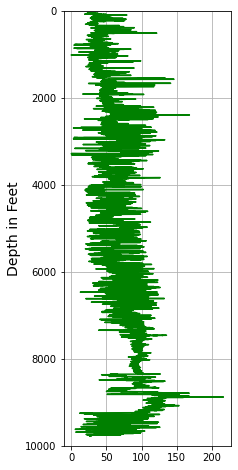

In [27]:
plt.figure(figsize=(3,8))
plt.plot(df.GR, df.DEPT, color='g')
plt.ylim(10000,0) # flipping the depth
plt.grid('TRUE')
plt.ylabel('Depth in Feet', size=14)
plt.show()

Curve is a little messy at this scale, lets pull in a Savitzky Golay Filter.

In [0]:
from scipy.signal import savgol_filter
yhat = savgol_filter(df.GR.values, 201, 3) # Window of 201, exponet of 3

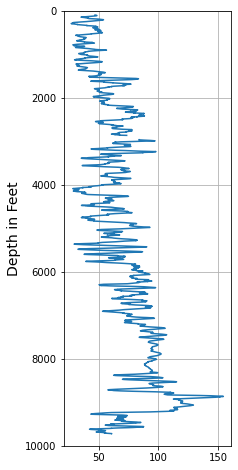

In [29]:
plt.figure(figsize=(3,8))
plt.plot(yhat,df.DEPT)
plt.ylim(10000,0) # flipping the depth
plt.grid('TRUE')
plt.ylabel('Depth in Feet', size=14)
plt.show()

# Writing out a las with the new data

We have made a new curve, the GRxPE magic. Let's add this to the well.

In [30]:
l.add_curve('GRxPE', df.GRxPE.values, unit='Magic')
l.curves

[CurveItem(mnemonic=DEPT, unit=FT, value=99 995 99  1, descr=Depth, original_mnemonic=DEPT, data.shape=(19655,)),
 CurveItem(mnemonic=CAL, unit=IN, value=70 280 99  1, descr=Caliper, original_mnemonic=CAL, data.shape=(19655,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=30 310  1  1, descr=Gamma Ray counts, original_mnemonic=GR, data.shape=(19655,)),
 CurveItem(mnemonic=M2R1, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 10 inch, original_mnemonic=M2R1, data.shape=(19655,)),
 CurveItem(mnemonic=M2R2, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 20 inch, original_mnemonic=M2R2, data.shape=(19655,)),
 CurveItem(mnemonic=M2R3, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 30 inch, original_mnemonic=M2R3, data.shape=(19655,)),
 CurveItem(mnemonic=M2R6, unit=OHMM, value=99 995 99  1, descr=Vert resolution matched (2 ft) res - DOI 60 inch, original_mnemonic=M2R6, data.shape=(19655,)),
 CurveItem(mn

In [0]:
l.write('Transform2020_Rules.las', version=2.0)

In [33]:
ls # check that it was written out

 0_Intro_To_Using_Colab.ipynb
 1_Pandas_Cleaning_Example_Geothermal.ipynb
 2_Intro_to_Lasio.ipynb
 4900722147_722147B.las
 490072236400.csv
 4900722364_722364A.las
 4900722364A.las
'B Romans - Intro.ipynb'
 clustering_TF2_GCP.ipynb
'Copy of clustering_TEST_GCP_TF1.ipynb'
 Transform2020_Rules.las


Fin! This is in no way exhaustative of what you can do with lasio or well logs in general. I hope some of the code blocks will be useful for future work. 